In [2]:
import json
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from sentinel_3_winding.winding import get_winding

Winding = CCW


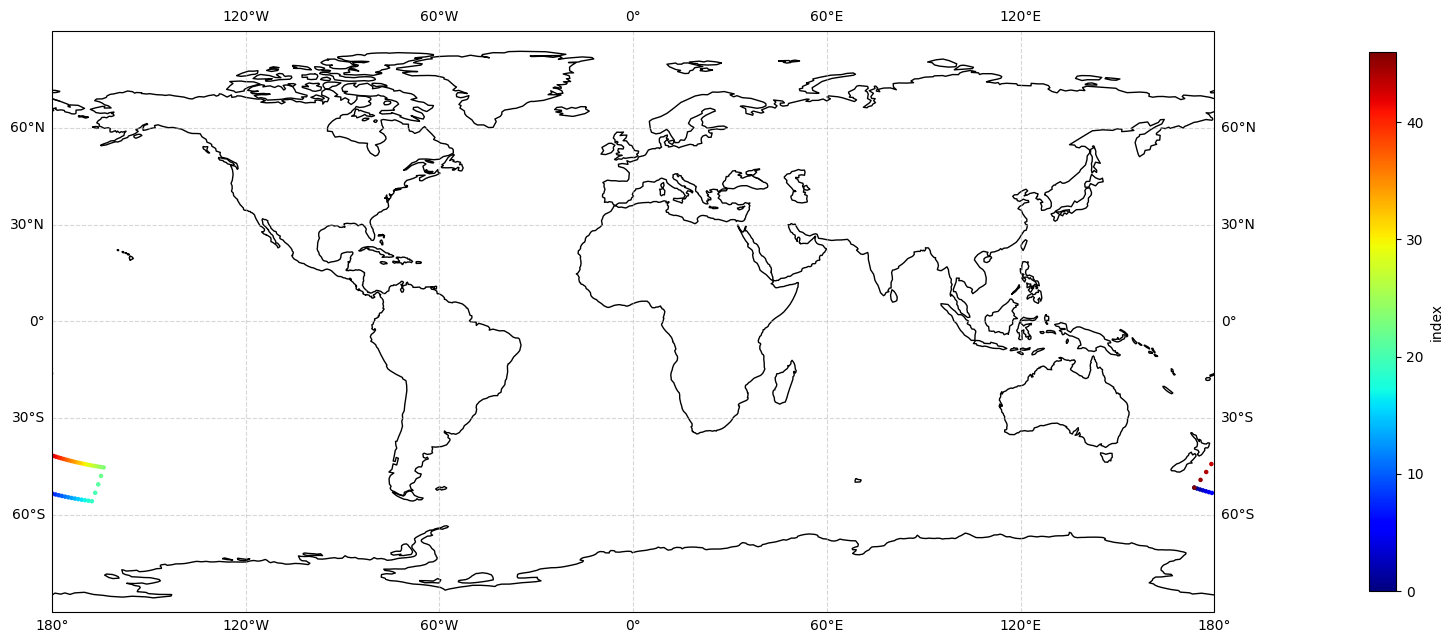

In [4]:
href = "../tests/data/S3A_OL_2_LFR_20160425T203817_20160425T204117_0179_003_242_3780.json"

with open(href, "r") as f:
    item = json.load(f)
coords = item["geometry"]["coordinates"][0]
print(f"Winding = {get_winding(coords, max_delta_lon=120)}")
xs = []
ys = []
idx = []
for i, coord in enumerate(coords):
    idx.append(i)
    xs.append(coord[0])
    ys.append(coord[1])

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, alpha=0.5, linestyle="--")
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
scatter = plt.scatter(
    xs, ys, c=idx, transform=ccrs.PlateCarree(), cmap="jet", marker=".", s=20
)
fig.colorbar(scatter, pad=0.1, shrink=0.35, label="index")
plt.show()